In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ath = pd.read_csv('attributeDifferences.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head()

In [ ]:
female = ath[~ath.sexFirst.str.contains("M")]
male = ath[~ath.sexFirst.str.contains("F")]

In [ ]:
topHeightMale = male.nlargest(10, ['heightDiff'])
topHeightFemale = female.nlargest(10, ['heightDiff'])

In [ ]:
bottomHeightMale = male.nsmallest(10, ['heightDiff'])
bottomHeightFemale = female.nsmallest(10, ['heightDiff'])

In [ ]:
topWeightMale = male.nlargest(10, ['weightDiff'])
topWeightFemale = female.nlargest(10, ['weightDiff'])
bottomWeightMale = male.nsmallest(10, ['weightDiff'])
bottomWeightFemale = female.nsmallest(10, ['weightDiff'])

In [ ]:
combinedHeightMale = topHeightMale.append(bottomHeightMale)

combinedHeightFemale = topHeightFemale.append(bottomHeightFemale)

combinedWeightMale = topWeightMale.append(bottomWeightMale)

combinedWeightFemale = topWeightFemale.append(bottomWeightFemale)


# Which events have had the biggest change in the athletes attributes from when they were first included in the Olympics, to the most recent running of that event?

In [ ]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedHeightMale['eventFirst'], x=combinedHeightMale['heightDiff'], palette='colorblind')

plt.title("Top Height Changes - Male")
plt.xlabel("Height diff in cm")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-17, 30)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedHeightFemale['eventFirst'], x=combinedHeightFemale['heightDiff'], palette='colorblind')

plt.title("Top Height Changes - Female ")
plt.xlabel("Height diff in cm")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-8, 15)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedWeightMale['eventFirst'], x=combinedWeightMale['weightDiff'], palette='colorblind')

plt.title("Top Weight Changes - Male ")
plt.xlabel("Weight diff in kg")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-30, 70)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedWeightFemale['eventFirst'], x=combinedWeightFemale['weightDiff'], palette='colorblind')

plt.title("Top Weight Changes - Female ")
plt.xlabel("Weight diff in kg")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-10, 30)

plt.show()

# Athletes(male and female) in which scale of age has more chance to win the medals on different sports? 

In [6]:
athleteNOC = pd.read_csv('athlete_physical_attributes.csv')

In [7]:
events = pd.pivot_table(athleteNOC,  index = ['Sex','Age'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)
event_gold = events.loc[(events['Gold'] > 10), :]
event_gold.head()

Medal,Sex,Age,Bronze,Gold,Silver,Grade
3,F,14,15,19,15,102
4,F,15,41,57,50,312
5,F,16,74,93,85,523
6,F,17,91,113,86,602
7,F,18,117,138,143,817


/Users/guyihan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


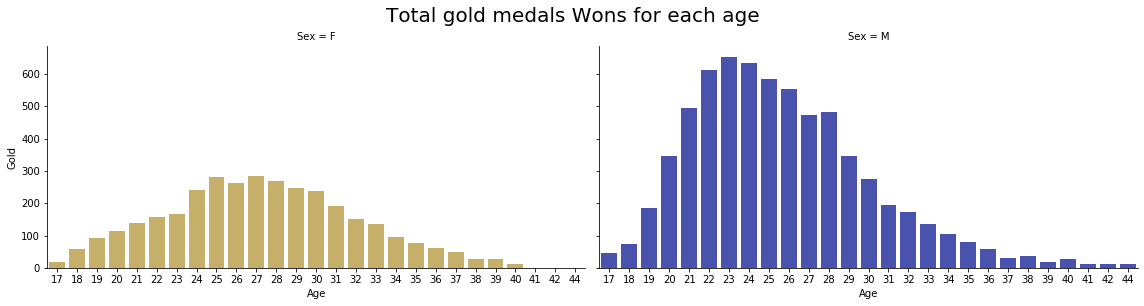

In [8]:

# Create an array with the colors you want to use
colors = ["#d5b85a","#3944bc"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(event_gold, col="Sex",hue="Sex",height=4,aspect=2)
g.map(sns.barplot,"Age", "Gold")
plt.suptitle('Total gold medals Wons for each age', size=20, y=1.05);      

In [9]:
medal_mean = athleteNOC.groupby(['Year','Sex','Age'])['Medal_Won'].agg('mean').reset_index()
medal_mean.head()


,Year,Sex,Age,Medal_Won
0,1896,M,20,1.000000
1,1896,M,21,0.454545
2,1896,M,23,0.333333
3,1896,M,24,0.333333
4,1896,M,26,0.333333


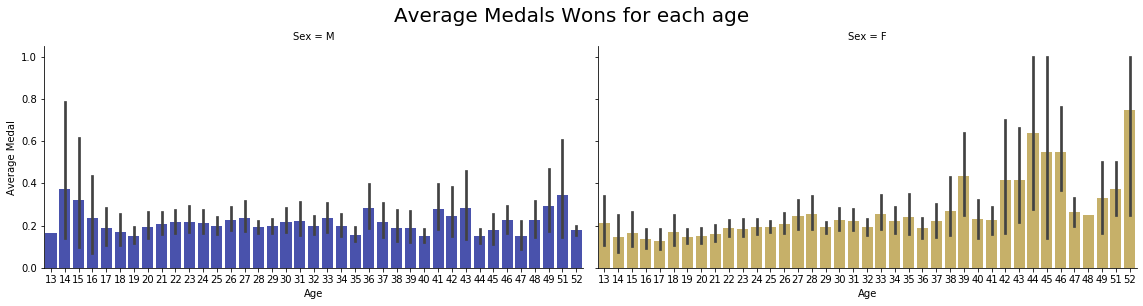

In [10]:
medal_mean = medal_mean.loc[(medal_mean['Medal_Won'] > 0 ), :]
colors = ["#3944bc","#d5b85a"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
g = sns.FacetGrid(medal_mean, col="Sex",hue="Sex",height=4,aspect=2)
g.map(sns.barplot,"Age", "Medal_Won")
g.set_axis_labels('Age', 'Average Medal')

plt.suptitle('Average Medals Wons for each age', size=20, y=1.05);      




In [12]:
athleteNOC_medal = athleteNOC.loc[(athleteNOC['Medal_Won'] > 0 )]

Ave_age = athleteNOC_medal[['Sport','Age','Sex']]
Ave_age = Ave_age.groupby(['Sport','Sex'])['Age'].agg('mean').reset_index()


Ave_age.head()

,Sport,Sex,Age
0,Alpine Skiing,F,23.383333
1,Alpine Skiing,M,25.672414
2,Archery,F,24.280000
3,Archery,M,25.273585
4,Art Competitions,M,32.000000


Text(0.5, 1, 'Average Age of Female that Won Medals for each Sports')

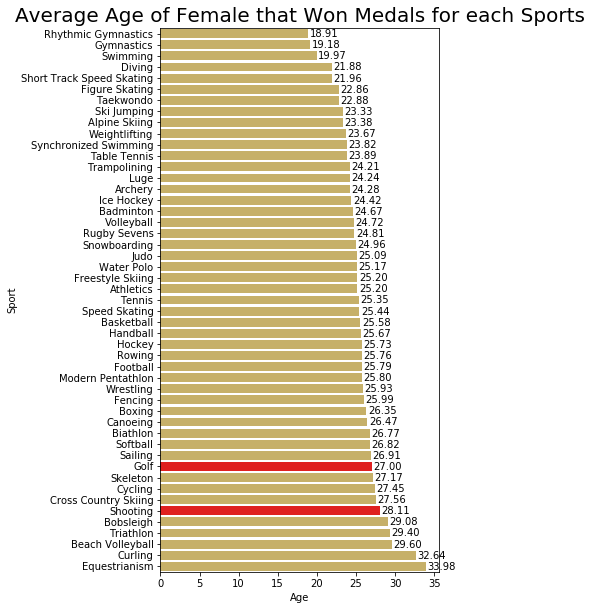

In [13]:
Ave_age_female = Ave_age.loc[(Ave_age['Sex'] == 'F' )]
Ave_age_female = Ave_age_female.sort_values(['Age']).reset_index(drop=True)

custom = {}
for q in set(Ave_age_female.Sport):
    if (q == 'Golf') or (q == 'Shooting') :
        custom[q] = 'red'
    else:
        custom[q] = '#d5b85a'

fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax= sns.barplot(x = "Age", y = "Sport", ax=ax, data=Ave_age_female,palette=custom)
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
ax.set_title('Average Age of Female that Won Medals for each Sports', size=20, y=1)







Text(0.5, 1, 'Male Average Age that Won Medals for each Sports')

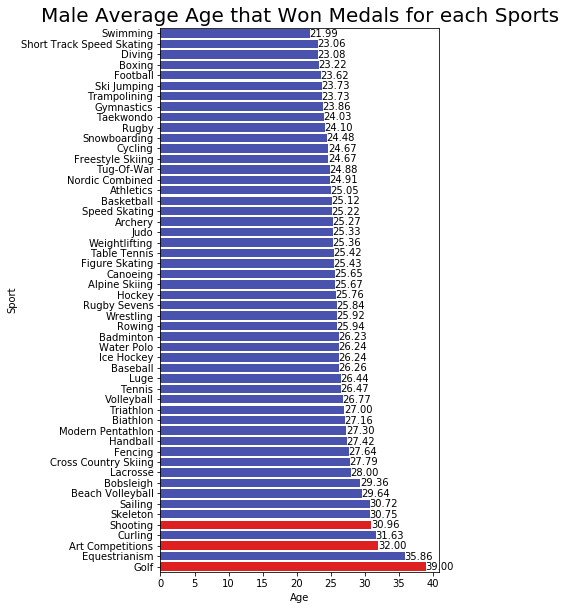

In [14]:
Ave_age_male = Ave_age.loc[(Ave_age['Sex'] == 'M' )]
Ave_age_male = Ave_age_male.sort_values(['Age']).reset_index(drop=True)

custom_palette = {}
for q in set(Ave_age_male.Sport):
    if (q == 'Golf') or (q == 'Shooting') or (q == 'Art Competitions'):
        custom_palette[q] = 'red'
    else:
        custom_palette[q] = '#3944bc'


fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax= sns.barplot(x = "Age", y = "Sport", ax=ax, data=Ave_age_male, palette=custom_palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

ax.set_title('Male Average Age that Won Medals for each Sports', size=20, y=1)

# What is connection between athletes’ weight and height on top sports that won the medals 


In [15]:
events = pd.pivot_table(athleteNOC,  index = ['Sport'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()
events.head()



Medal,Sport,Bronze,Gold,Silver
0,Alpine Skiing,113,121,120
1,Archery,71,64,71
2,Art Competitions,1,1,0
3,Athletics,1161,1292,1195
4,Badminton,55,48,51


Text(0.5, 1, 'Top Sports won Medels')

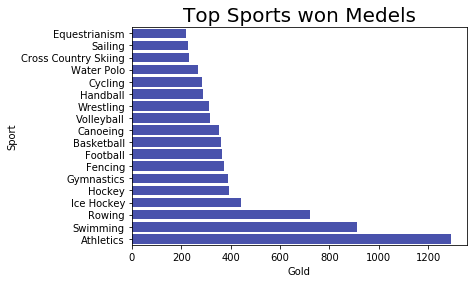

In [16]:
events = events.loc[(events['Gold'] > 200 ), :]
events = events.sort_values(['Gold']).reset_index(drop=True)

g1 =sns.barplot(x='Gold',y='Sport',data=events,color="#3944bc")
g1.set_title("Top Sports won Medels", size=20, y=1)



In [17]:
athleteNOC_Sw = athleteNOC.loc[(athleteNOC['Sport'] == 'Swimming' )]
athleteNOC_Sw = athleteNOC_Sw.loc[(athleteNOC['Medal_Won'] > 0 )]

In [18]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    plt.legend(legends)

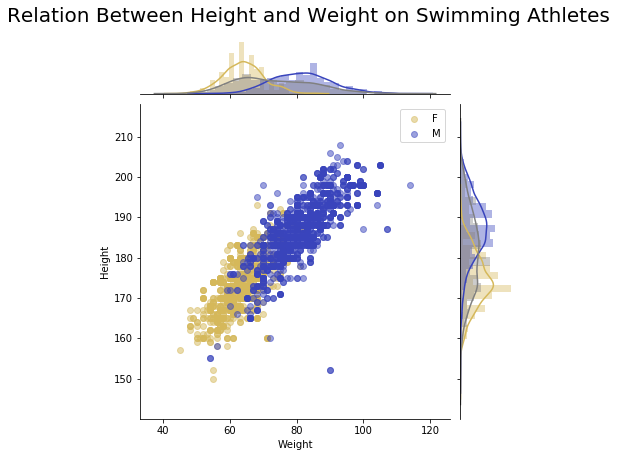

In [19]:

df =athleteNOC_Sw
colors = ["#d5b85a","#3944bc"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
multivariateGrid('Weight', 'Height', 'Sex', df=df)
plt.suptitle('Relation Between Height and Weight on Swimming Athletes', size=20, y=1.05);      



